In [24]:
# Importing common libraries:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import math

In [3]:
# Importing my env and wrangle files:
import env
import wrangle

wrangle.py functions loaded successfully.


In [4]:
train, validate, test = wrangle.wrangle_telco()

Shape of train df: (1224, 6)
Shape of validate df: (216, 6)
Shape of test df: (255, 6)


In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,total_charges_scaled,monthly_charges_scaled,tenure_scaled
1540,7601-DHFWZ,24.00,48,1183.05,3,Two year,0.134470,0.054446,0.661972
1187,2017-CCBLH,20.00,8,141.60,3,Two year,0.014075,0.014486,0.098592
1106,0825-CPPQH,19.10,71,1372.45,3,Two year,0.156365,0.005495,0.985915
909,6733-LRIZX,108.95,35,4025.50,3,Two year,0.463068,0.903097,0.478873
1271,3274-NSDWE,19.60,68,1441.65,3,Two year,0.164365,0.010490,0.943662


## Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

### 1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

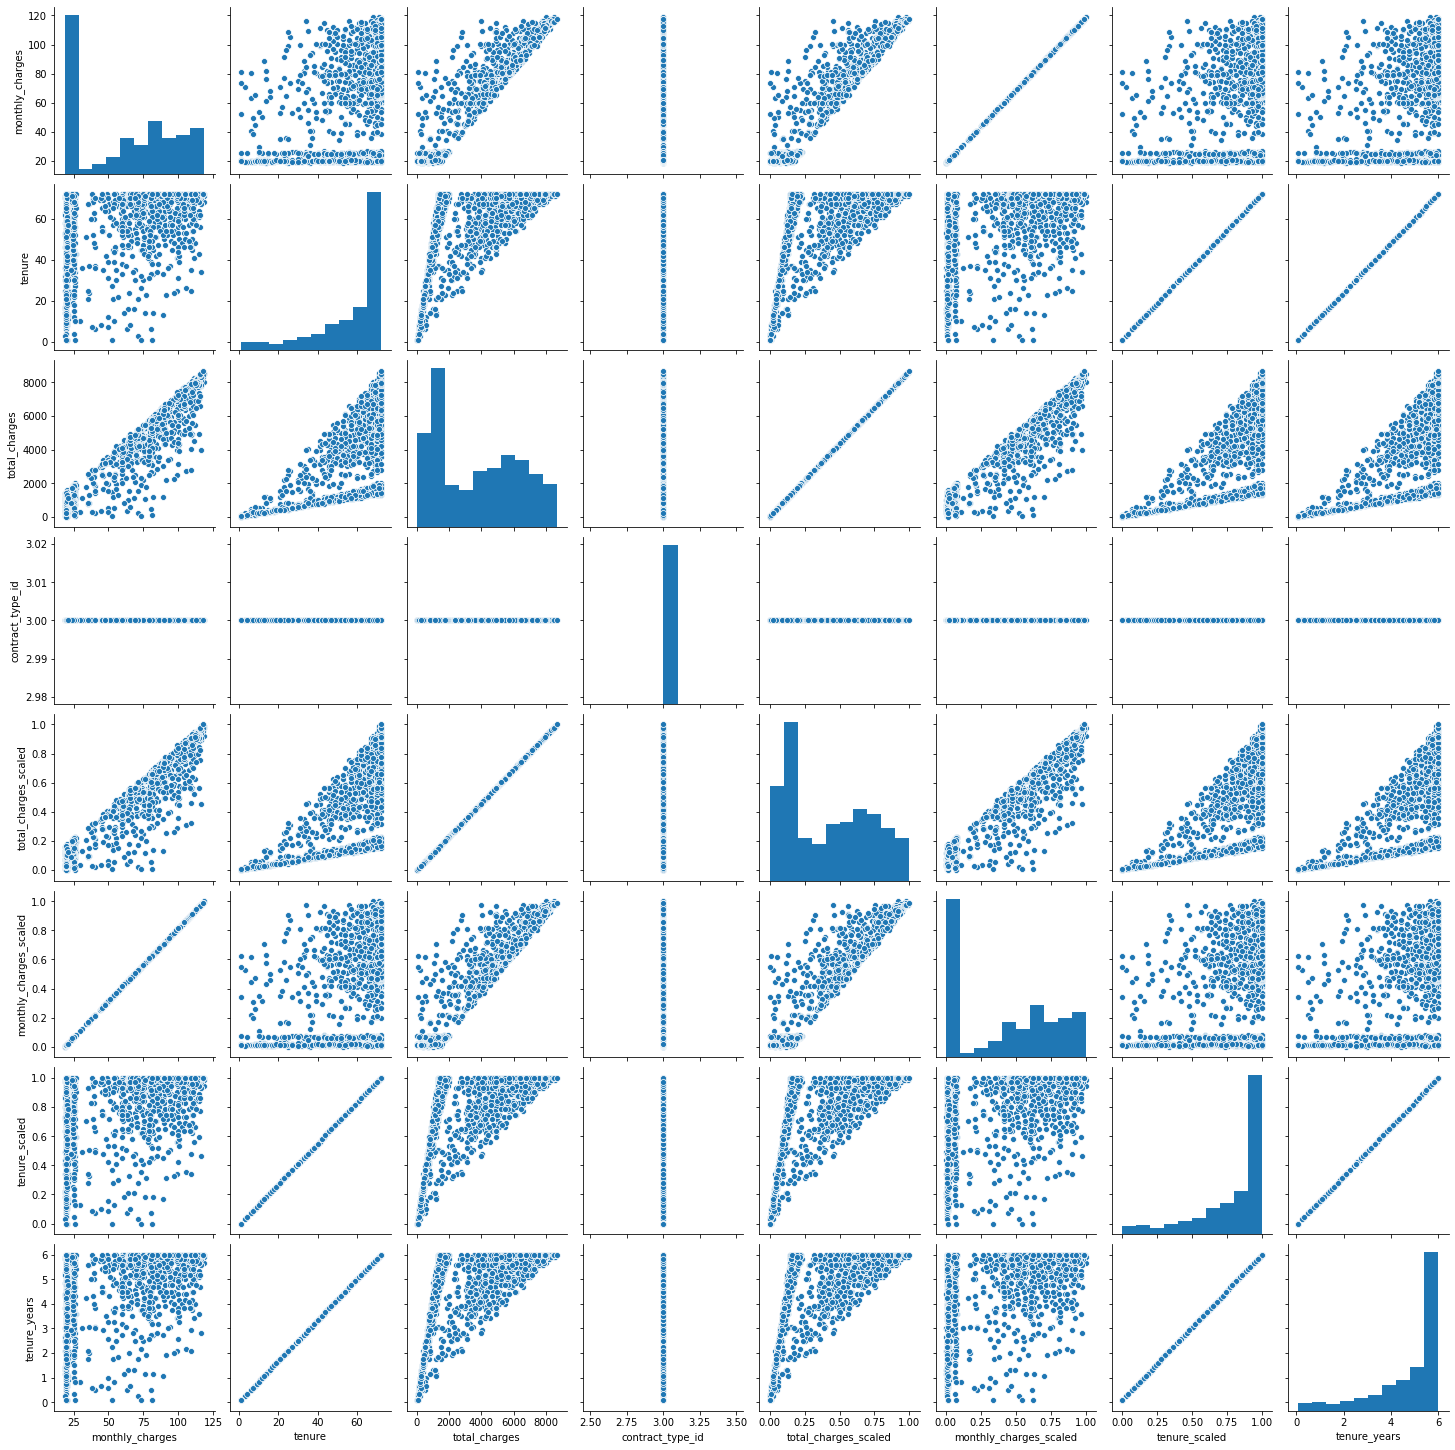

In [10]:
sns.pairplot(data = train)

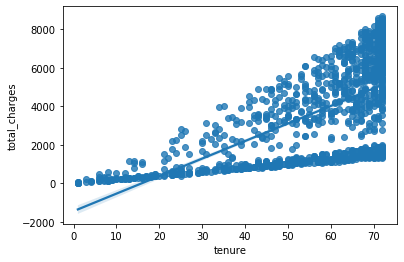

In [12]:
sns.regplot(data = train, y = 'total_charges', x = 'tenure')

In [42]:
# Creating the function which is functionally the same as a pairplot function in seaborn. However this gives us more control over the types of charts that are within the pairwise plot:

def plot_variable_pairs_first(df):
    graph = sns.PairGrid(df) 
    graph.map_diag(plt.hist)
    graph.map_offdiag(sns.regplot) 

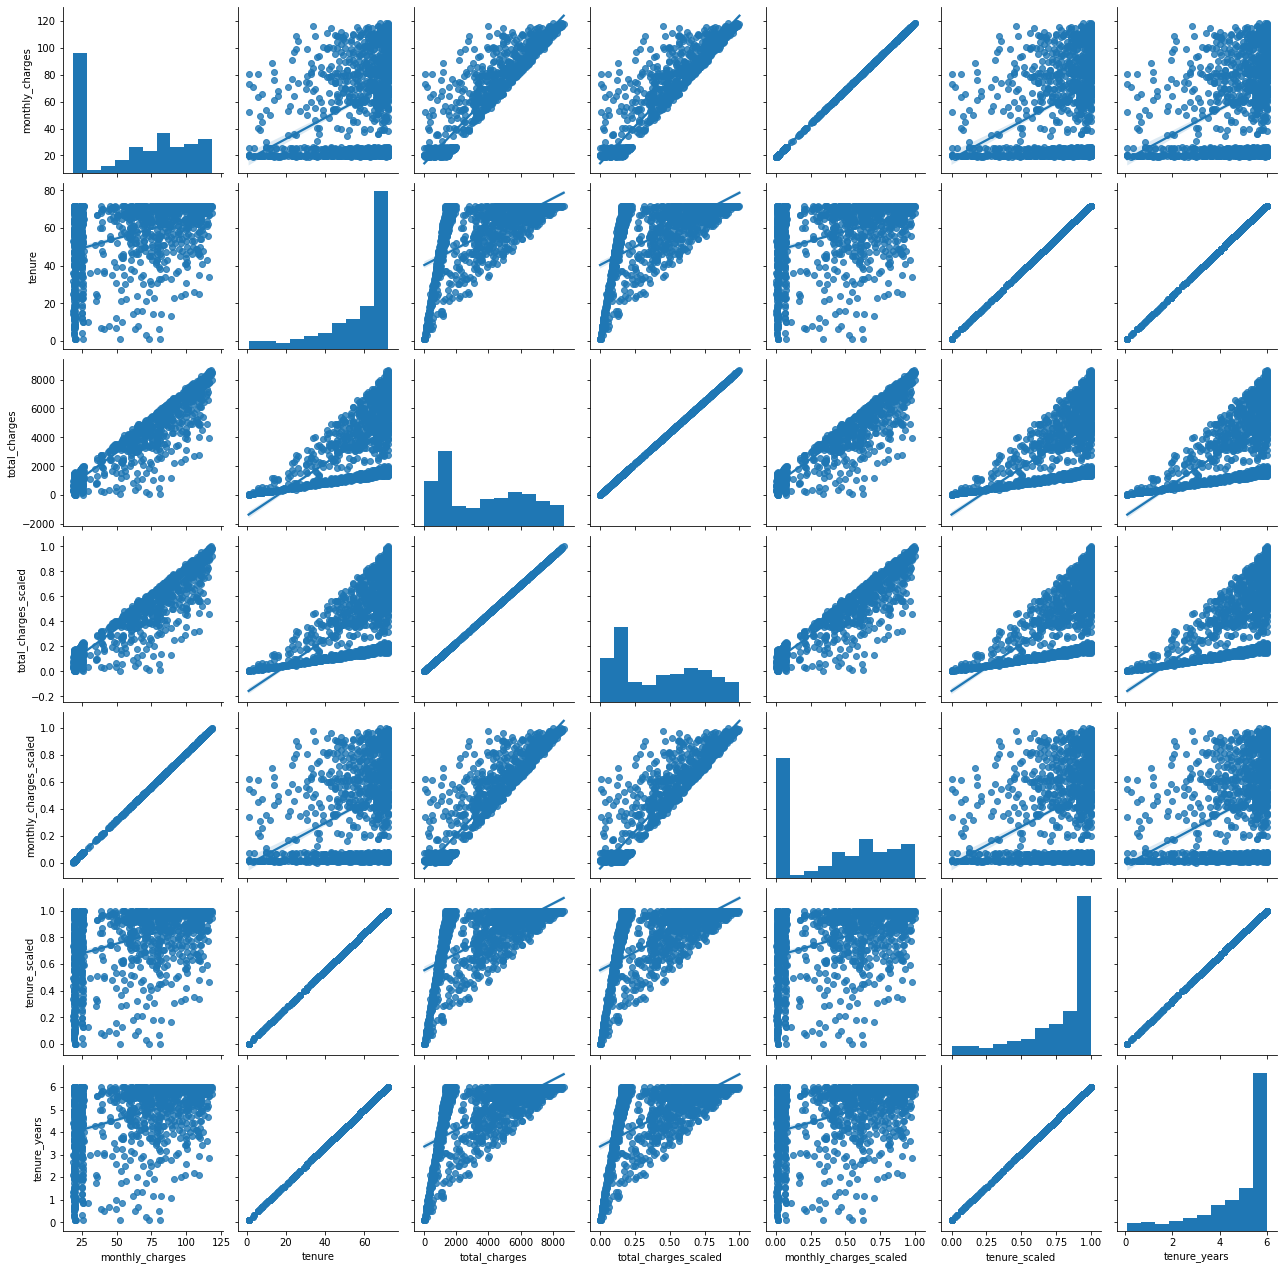

In [24]:
# Calling the function (testing it to make sure the output is what I want.)

plot_variable_pairs(train.drop(columns = 'contract_type_id'))

In [17]:
# But I want this to work for any dataframe I pass in, whether they have scaled columns or not:

def plot_variable_pairs(df, drop_scaled_columns = True):
    if drop_scaled_columns:
        # drop the scaled columns
        scaled_columns = [c for c in df.columns if c.endswith('_scaled')]
        df = df.drop(columns = scaled_columns)
        
    graph = sns.PairGrid(df) 
    graph.map_diag(plt.hist)
    graph.map_offdiag(sns.regplot) 
    
    return graph

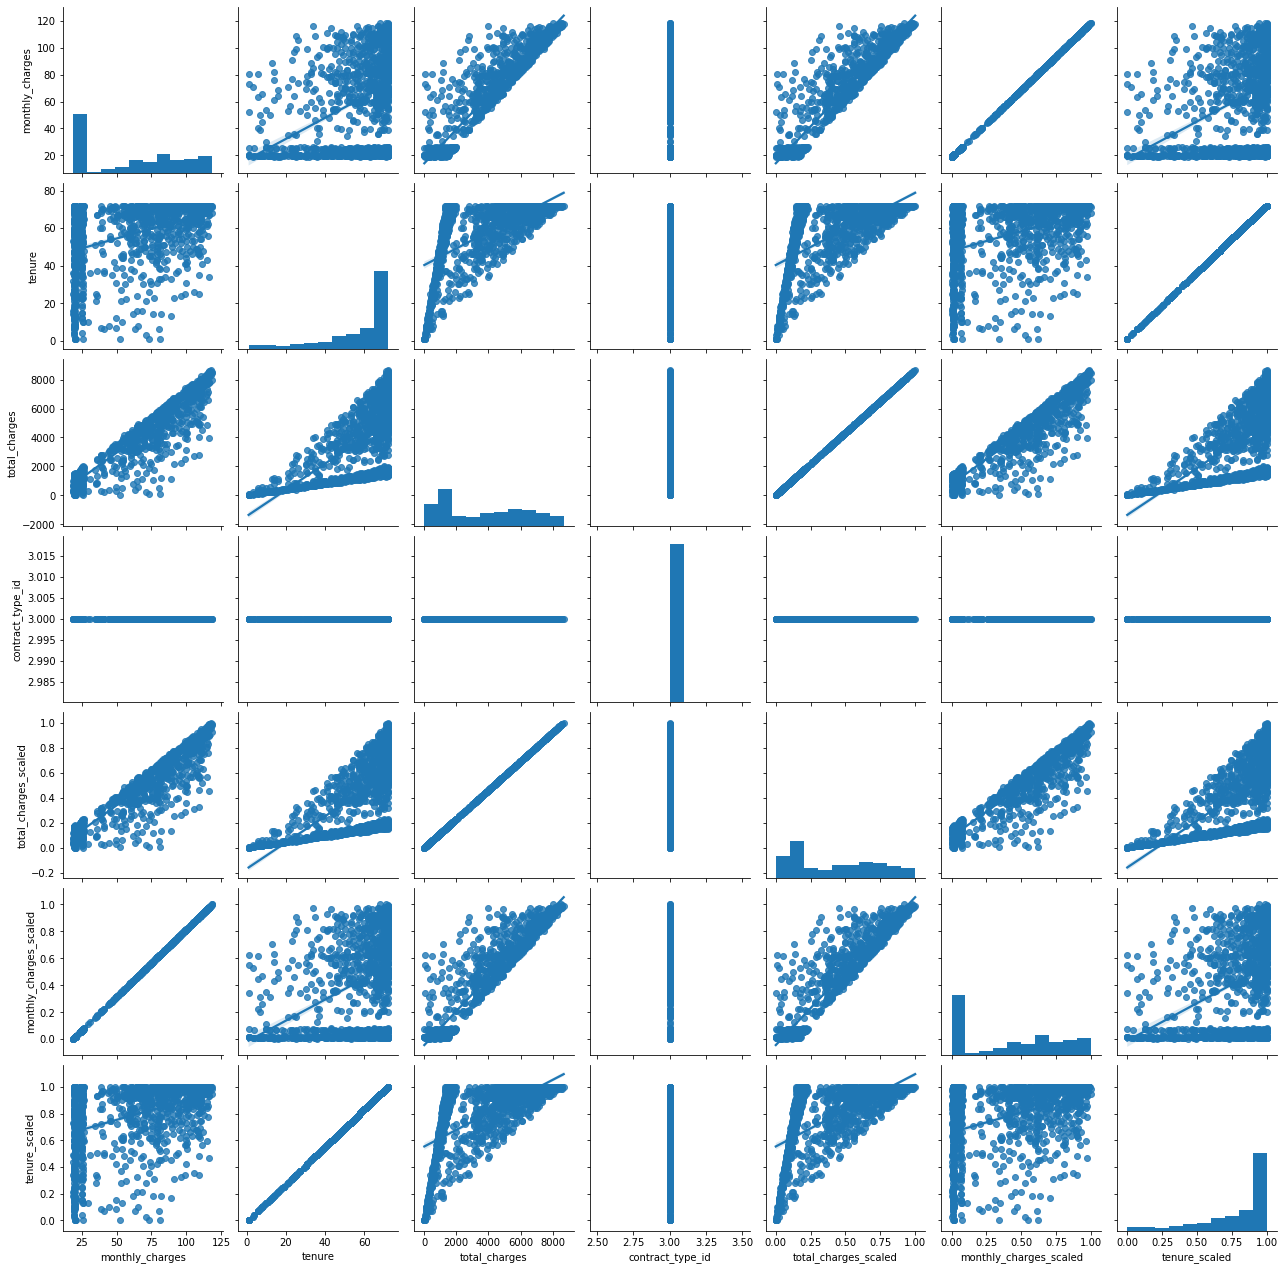

In [19]:
plot_variable_pairs(train, drop_scaled_columns=False)

### 2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [31]:
# So this is the action that I want the function to output, but have this wrapped inside a function:

round(train.tenure / 12, 0)

1540    4.0
1187    1.0
1106    6.0
909     3.0
1271    6.0
       ... 
1578    5.0
1043    6.0
1378    5.0
596     6.0
843     5.0
Name: tenure, Length: 1224, dtype: float64

In [28]:
# Creating the function months to years:

def months_to_years_mine(tenure_months, df):
    df['tenure_years'] = round(tenure_months // 12, 0)
    return df

In [29]:

def months_to_years(df):
    df.assign(tenure_years = (df.tenure / 12).apply(math.floor))
    return df

In [30]:
months_to_years(train)

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,total_charges_scaled,monthly_charges_scaled,tenure_scaled,monthly_charge_bin
1540,7601-DHFWZ,24.00,48,1183.05,3,Two year,0.134470,0.054446,0.661972,Low
1187,2017-CCBLH,20.00,8,141.60,3,Two year,0.014075,0.014486,0.098592,Low
1106,0825-CPPQH,19.10,71,1372.45,3,Two year,0.156365,0.005495,0.985915,Low
909,6733-LRIZX,108.95,35,4025.50,3,Two year,0.463068,0.903097,0.478873,High
1271,3274-NSDWE,19.60,68,1441.65,3,Two year,0.164365,0.010490,0.943662,Low
...,...,...,...,...,...,...,...,...,...,...
1578,8164-OCKUJ,20.60,59,1286.00,3,Two year,0.146371,0.020480,0.816901,Low
1043,9739-JLPQJ,117.50,72,8670.10,3,Two year,1.000000,0.988511,1.000000,High
1378,4990-ALDGW,20.75,57,1118.80,3,Two year,0.127043,0.021978,0.788732,Low
596,9489-DEDVP,69.20,70,4872.35,3,Two year,0.560966,0.505994,0.971831,Med-High


In [32]:
# Running the function to test it:

months_to_years_mine(train['tenure'], train)

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,total_charges_scaled,monthly_charges_scaled,tenure_scaled,monthly_charge_bin,tenure_years
1540,7601-DHFWZ,24.00,48,1183.05,3,Two year,0.134470,0.054446,0.661972,Low,4
1187,2017-CCBLH,20.00,8,141.60,3,Two year,0.014075,0.014486,0.098592,Low,0
1106,0825-CPPQH,19.10,71,1372.45,3,Two year,0.156365,0.005495,0.985915,Low,5
909,6733-LRIZX,108.95,35,4025.50,3,Two year,0.463068,0.903097,0.478873,High,2
1271,3274-NSDWE,19.60,68,1441.65,3,Two year,0.164365,0.010490,0.943662,Low,5
...,...,...,...,...,...,...,...,...,...,...,...
1578,8164-OCKUJ,20.60,59,1286.00,3,Two year,0.146371,0.020480,0.816901,Low,4
1043,9739-JLPQJ,117.50,72,8670.10,3,Two year,1.000000,0.988511,1.000000,High,6
1378,4990-ALDGW,20.75,57,1118.80,3,Two year,0.127043,0.021978,0.788732,Low,4
596,9489-DEDVP,69.20,70,4872.35,3,Two year,0.560966,0.505994,0.971831,Med-High,5


### 3. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [39]:
def plot_categorical_and_continuous_vars(cat_var, continuous_var,  df):
    plt.rc('font', size = 13)
    plt.rc('figure', figsize = (13, 7))
    sns.boxplot(data = df, y = continuous_var, x = cat_var)
    plt.show()
    sns.swarmplot(data = df, y = continuous_var, x = cat_var)
    plt.show()
    sns.violinplot(data = df, y = continuous_var, x = cat_var)
    plt.show()
    

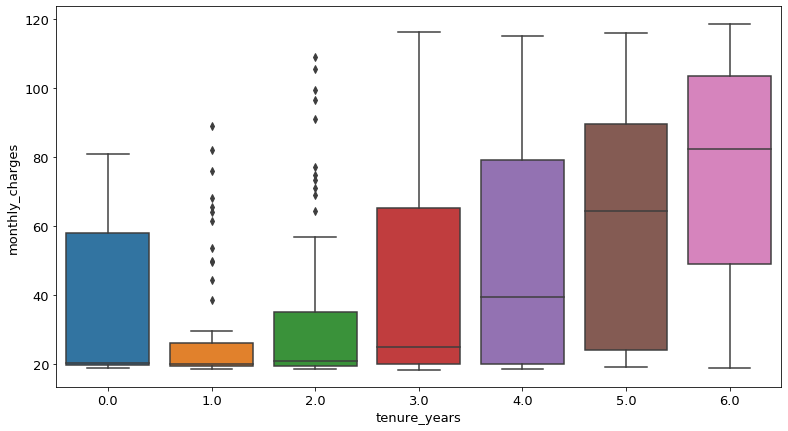

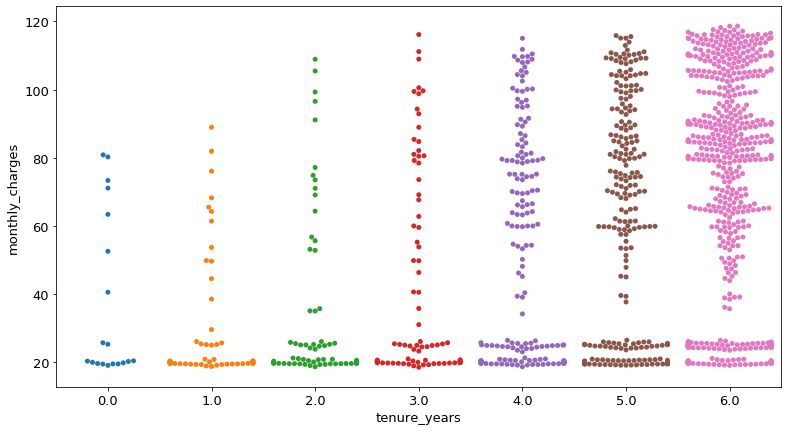

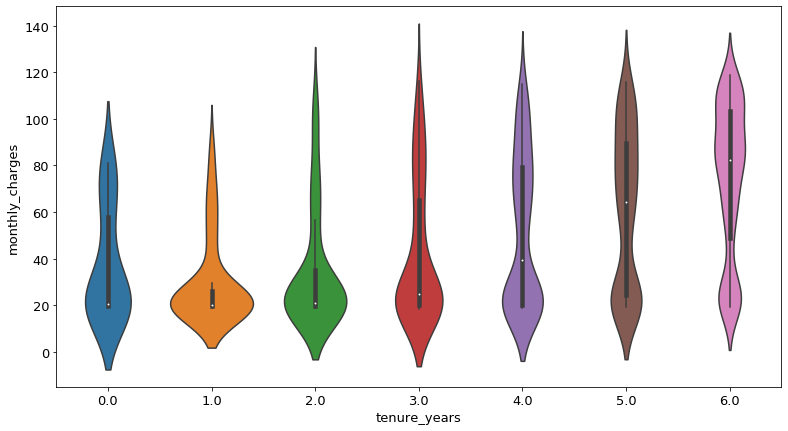

In [40]:
plot_categorical_and_continuous_vars('tenure_years', 'monthly_charges', train)

In [33]:
train.tenure_years

1540    4
1187    0
1106    5
909     2
1271    5
       ..
1578    4
1043    6
1378    4
596     5
843     4
Name: tenure_years, Length: 1224, dtype: int64

In [38]:
def plot_categorical_and_continuous_vars(cat_var, cont_var, df):
    '''
    This function will take in a categorical variable and a continuous variable
    and return 3 charts based on those variables.
    Note that the categorical variable is tied to the x axis, and the continuious variable to the y axis.
    ''' 
    # Add in an if function that returns an error if the categorical variable isn't a categorical type(?)
    # That may not be useful...
    
    
    sns.barplot(data = df, y = cont_var, x = cat_var)
    plt.show()
    sns.violinplot(data = df, y = cont_var, x = cat_var)
    plt.show()
    sns.boxplot(data = df, y = cont_var, x = cat_var)

### 4.Save the functions you have written to create visualizations in a file named `explore.py`. Rewrite your notebook code so that you are using the functions imported from this file.

In [43]:
# done

### 5. Explore your dataset with any other visualizations you think will be helpful.

In [6]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,total_charges_scaled,monthly_charges_scaled,tenure_scaled
1540,7601-DHFWZ,24.00,48,1183.05,3,Two year,0.134470,0.054446,0.661972
1187,2017-CCBLH,20.00,8,141.60,3,Two year,0.014075,0.014486,0.098592
1106,0825-CPPQH,19.10,71,1372.45,3,Two year,0.156365,0.005495,0.985915
909,6733-LRIZX,108.95,35,4025.50,3,Two year,0.463068,0.903097,0.478873
1271,3274-NSDWE,19.60,68,1441.65,3,Two year,0.164365,0.010490,0.943662


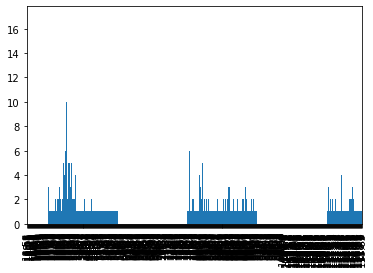

In [7]:
train.monthly_charges.value_counts().sort_index().plot.bar()

In [8]:
train.describe()

,monthly_charges,tenure,total_charges,contract_type_id,total_charges_scaled,monthly_charges_scaled,tenure_scaled
count,1224.000000,1224.000000,1224.000000,1224.0,1224.000000,1224.000000,1224.000000
mean,61.099592,56.782680,3720.889011,3.0,0.427853,0.425071,0.785672
std,34.650483,17.933743,2563.966990,0.0,0.296404,0.346159,0.252588
min,18.550000,1.000000,19.850000,3.0,0.000000,0.000000,0.000000
25%,24.000000,48.000000,1271.675000,3.0,0.144715,0.054446,0.661972
50%,64.925000,64.000000,3617.900000,3.0,0.415948,0.463287,0.887324
75%,90.412500,71.000000,5975.862500,3.0,0.688536,0.717907,0.985915
max,118.650000,72.000000,8670.100000,3.0,1.000000,1.000000,1.000000


In [12]:
train['monthly_charge_bin'] = pd.cut(train.monthly_charges, bins=[0, 28, 48, 88, 120], labels=['Low', 'Medium', 'Med-High', 'High'])
train.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type_id,contract_type,total_charges_scaled,monthly_charges_scaled,tenure_scaled,monthly_charge_bin
1540,7601-DHFWZ,24.00,48,1183.05,3,Two year,0.134470,0.054446,0.661972,Low
1187,2017-CCBLH,20.00,8,141.60,3,Two year,0.014075,0.014486,0.098592,Low
1106,0825-CPPQH,19.10,71,1372.45,3,Two year,0.156365,0.005495,0.985915,Low
909,6733-LRIZX,108.95,35,4025.50,3,Two year,0.463068,0.903097,0.478873,High
1271,3274-NSDWE,19.60,68,1441.65,3,Two year,0.164365,0.010490,0.943662,Low


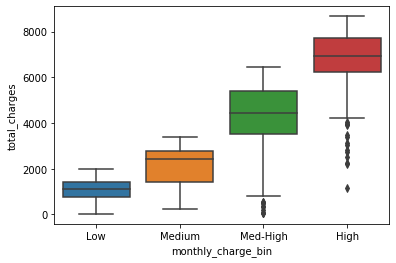

In [14]:
sns.boxplot(x = 'monthly_charge_bin', y = 'total_charges', data = train)

### 6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [15]:
# done